In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
movies = pd.read_csv(r"C:\Users\disha\Desktop\Codenera Training\FINAL_DATA_ANALYTICS_PROJECT\archive (4)\movies.csv")
ratings = pd.read_csv(r"C:\Users\disha\Desktop\Codenera Training\FINAL_DATA_ANALYTICS_PROJECT\archive (4)\ratings.csv")
tags = pd.read_csv(r"C:\Users\disha\Desktop\Codenera Training\FINAL_DATA_ANALYTICS_PROJECT\archive (4)\tags.csv")
links = pd.read_csv(r"C:\Users\disha\Desktop\Codenera Training\FINAL_DATA_ANALYTICS_PROJECT\archive (4)\links.csv")

In [4]:
movies.head(), ratings.head(), tags.head(), links.head()

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       

In [5]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['date'].dt.year
ratings['month'] = ratings['date'].dt.month
ratings['day'] = ratings['date'].dt.day

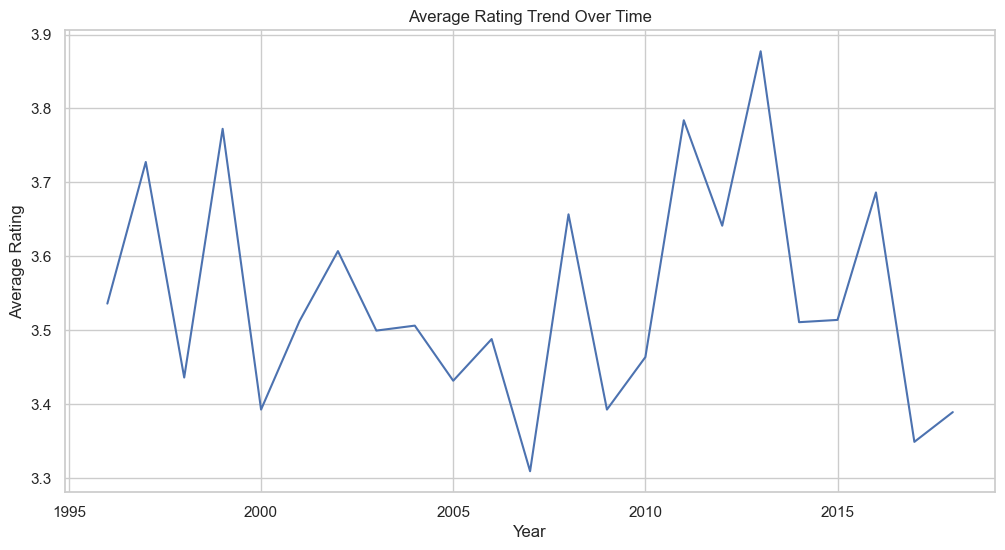

In [6]:
avg_trend = ratings.groupby('year')['rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_trend.index, avg_trend.values)
plt.title("Average Rating Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [7]:
ratings[['timestamp','date','year','month','day']].head()

,timestamp,date,year,month,day
0,964982703,2000-07-30 18:45:03,2000,7,30
1,964981247,2000-07-30 18:20:47,2000,7,30
2,964982224,2000-07-30 18:37:04,2000,7,30
3,964983815,2000-07-30 19:03:35,2000,7,30
4,964982931,2000-07-30 18:48:51,2000,7,30


In [8]:
pivot_table = ratings.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
)

pivot_table.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
movies['genres'] = movies['genres'].astype(str)

movies['genres'] = movies['genres'].str.split('|')

movies_exp = movies.explode('genres')

In [16]:
movie_ratings = ratings.merge(movies_exp, on='movieId')

genre_year = movie_ratings.groupby(['year','genres'])['rating'].mean().reset_index()

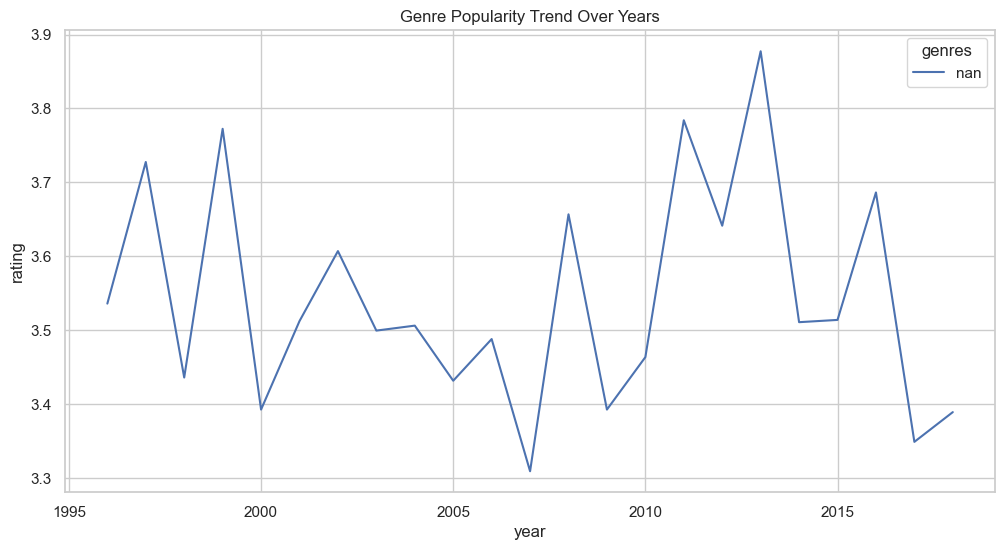

In [17]:
top_genres = genre_year.groupby('genres')['rating'].mean().sort_values(ascending=False).head(5).index
filtered = genre_year[genre_year['genres'].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x='year', y='rating', hue='genres')
plt.title("Genre Popularity Trend Over Years")
plt.show()

In [21]:
import os
os.getcwd()

'C:\\Users\\disha\\Desktop\\Codenera Training\\FINAL_DATA_ANALYTICS_PROJECT'

In [22]:
os.listdir()

['.ipynb_checkpoints',
 'archive (4)',
 'pandas_task.ipynb',
 'sql_dataset_imp.sql']

In [27]:
movie_var = ratings.groupby('movieId')['rating'].var().reset_index()
movie_var = movie_var.merge(movies, on='movieId')

controversial = movie_var.sort_values('rating', ascending=False).head(10)
controversial

,movieId,rating,title,genres
5851,32892,10.125,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,[nan]
1532,2068,10.125,Fanny and Alexander (Fanny och Alexander) (1982),[nan]
7519,84847,8.000,Emma (2009),[nan]
421,484,8.000,Lassie (1994),[nan]
4954,7564,8.000,Kwaidan (Kaidan) (1964),[nan]
2421,3223,8.000,"Zed & Two Noughts, A (1985)",[nan]
7097,70946,6.750,Troll 2 (1990),[nan]
8643,121097,6.125,To Grandmother's House We Go (1992),[nan]
8333,108689,6.125,"I, Frankenstein (2014)",[nan]
9517,172547,6.125,Despicable Me 3 (2017),[nan]


In [28]:
movies_exp = movies.explode('genres')
movie_ratings = ratings.merge(movies_exp, on="movieId")

In [29]:
genre_top5 = movie_ratings.groupby(['genres','title'])['rating'].mean().reset_index()
genre_top5 = genre_top5.sort_values(['genres','rating'], ascending=[True,False])

In [30]:
top5_per_genre = genre_top5.groupby('genres').head(5)
top5_per_genre

,genres,title,rating
3,nan,'Salem's Lot (2004),5.0
35,nan,12 Angry Men (1997),5.0
37,nan,12 Chairs (1976),5.0
68,nan,20 Million Miles to Earth (1957),5.0
131,nan,61* (2001),5.0


In [31]:
global_avg = ratings['rating'].mean()

user_dev = ratings.groupby('userId')['rating'].mean().reset_index()
user_dev['deviation'] = abs(user_dev['rating'] - global_avg)

extreme_users = user_dev.sort_values("deviation", ascending=False).head(10)
extreme_users

,userId,rating,deviation
441,442,1.275000,2.226557
52,53,5.000000,1.498443
250,251,4.869565,1.368008
138,139,2.144330,1.357227
507,508,2.145833,1.355724
514,515,4.846154,1.344597
24,25,4.807692,1.306135
152,153,2.217877,1.283680
566,567,2.245455,1.256102
29,30,4.735294,1.233737
